In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#External Libraries
!pip install plotly
!pip install lightgbm

#step 2 dataset loaded


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving flotation plant.csv to flotation plant.csv


 # pandas is used for handling data in table form (DataFrames)


In [ ]:
df = pd.read_csv('flotation plant.csv')
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,3/10/2017 1:00,"55,2","16,98","3019,53","557,434","395,713","100,664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,3/10/2017 1:00,"55,2","16,98","3024,41","563,965","397,383","100,672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,3/10/2017 1:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,3/10/2017 1:00,"55,2","16,98","3047,36","568,665","397,939","100,689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,3/10/2017 1:00,"55,2","16,98","3033,69","558,167","400,254","100,697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (737453, 24)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

#for checking missing values

In [ ]:
df.isnull().sum()

,0
date,0
% Iron Feed,0
% Silica Feed,0
Starch Flow,0
Amina Flow,0
Ore Pulp Flow,0
Ore Pulp pH,0
Ore Pulp Density,0
Flotation Column 01 Air Flow,0
Flotation Column 02 Air Flow,0


to get summary of all columns

In [ ]:
df.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453,...,737453,737453,737453,737453,737453,737453,737453,737453,737453,737453
unique,4097,278,293,409266,319416,180189,131143,105805,43675,80442,...,86819,299573,331189,322315,309264,276051,301502,295667,38696,55569
top,9/9/2017 23:00,"64,03","6,26","2562,5","534,668","402,246","100,591","1,75","299,927","255,322",...,"299,487","452,441","608,887","601,06","491,406","513,879","474,37","479,478","65,44","2,08"
freq,180,142560,142560,690,959,1735,1509,3214,13683,1487,...,3405,1013,817,989,733,709,746,905,16920,17100


In [ ]:
import plotly.express as px

missing = df.isnull().sum()
missing = missing[missing > 0]

if not missing.empty:
    fig = px.bar(x=missing.index, y=missing.values, labels={'x':'Column', 'y':'Missing Count'},
                 title="Missing Values per Column")
    fig.show()
else:
    print("✅ No missing values found!")

✅ No missing values found!


Drop date column (not useful for training)

In [ ]:
df = df.drop([col for col in df.columns if 'date' in col.lower()], axis=1)

In [ ]:
import re

def clean_value(val):
    val = str(val)
    parts = val.split(',')
    if len(parts) == 2:
        val = parts[0].replace('.', '') + '.' + parts[1]
    else:
        val = val.replace('.', '').replace(',', '.')
    try:
        return float(val)
    except:
        return None

for col in df.columns:
    df[col] = df[col].apply(clean_value)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   621807 non-null  float64
 3   Amina Flow                    682697 non-null  float64
 4   Ore Pulp Flow                 596225 non-null  float64
 5   Ore Pulp pH                   720294 non-null  float64
 6   Ore Pulp Density              660938 non-null  float64
 7   Flotation Column 01 Air Flow  722328 non-null  float64
 8   Flotation Column 02 Air Flow  719574 non-null  float64
 9   Flotation Column 03 Air Flow  721724 non-null  float64
 10  Flotation Column 04 Air Flow  550439 non-null  float64
 11  Flotation Column 05 Air Flow  554464 non-null  float64
 12  Flotation Column 06 Air Flow  730564 non-nul

In [ ]:
print(df.columns.tolist())

['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow', 'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level', '% Iron Concentrate', '% Silica Concentrate']


Drop rows that have missing values



In [ ]:
df_cleaned = df.dropna()

X = df_cleaned.drop('% Silica Concentrate', axis=1)
y = df_cleaned['% Silica Concentrate']

#selected top 15 features most relavant to target

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=15)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X = X[selected_features]

#split data into training 80% and test 20%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#models training

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

#Random Forest
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R² Score:", r2_score(y_test, rf_preds))

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_preds = lgbm.predict(X_test)

#LightGBM
print("\n⚡ LightGBM Results:")
print("MAE:", mean_absolute_error(y_test, lgbm_preds))
print("MSE:", mean_squared_error(y_test, lgbm_preds))
print("R² Score:", r2_score(y_test, lgbm_preds))

from sklearn.neural_network import MLPRegressor

ann = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
ann.fit(X_train, y_train)
ann_preds = ann.predict(X_test)

#ANN
print("MAE:", mean_absolute_error(y_test, ann_preds))
print("MSE:", mean_squared_error(y_test, ann_preds))
print("R² Score:", r2_score(y_test, ann_preds))

import plotly.graph_objects as go

fig = go.Figure()

# Actual values
fig.add_trace(go.Scatter(
    y=y_test.values[:300],
    mode='lines',
    name='Actual',
    line=dict(color='black')
))

fig.add_trace(go.Scatter(
    y=rf_preds[:300],
    mode='lines',
    name='Random Forest',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    y=lgbm_preds[:300],
    mode='lines',
    name='LightGBM',
    line=dict(color='orange')
))

fig.add_trace(go.Scatter(
    y=ann_preds[:300],
    mode='lines',
    name='ANN',
    line=dict(color='blue')
))

fig.update_layout(
    title="📊 Model Predictions vs Actual - Top 15 Features (SelectKBest)",
    xaxis_title="Sample Index (First 300)",
    yaxis_title="% Silica Concentrate",
    template="plotly_white"
)

fig.show()

🌲 Random Forest Results:
MAE: 0.03879836007883002
MSE: 0.012567414186021962
R² Score: 0.9872211329568882
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3824
[LightGBM] [Info] Number of data points in the train set: 255743, number of used features: 15
[LightGBM] [Info] Start training from score 2.084226

⚡ LightGBM Results:
MAE: 0.30441931322731985
MSE: 0.17104065224727455
R² Score: 0.8260815055760566

 ANN Results:
MAE: 0.46614845416239414
MSE: 0.35834687716664876
R² Score: 0.6356237623074289


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.043339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3824
[LightGBM] [Info] Number of data points in the train set: 255743, number of used features: 15
[LightGBM] [Info] Start training from score 2.084226
🔝 Top LightGBM Features:
% Iron Concentrate              1174
Amina Flow                       335
Flotation Column 01 Level        239
Flotation Column 03 Level        202
Flotation Column 06 Level        194
Flotation Column 01 Air Flow     152
Flotation Column 05 Level        135
Flotation Column 02 Level        132
Flotation Column 02 Air Flow      94
Flotation Column 06 Air Flow      82
Flotation Column 07 Level         74
Flotation Column 04 Level         58
Flotation Column 07 Air Flow      57
Flotation Column 03 Air Flow      51
Flotation Column 04 Air Flow      

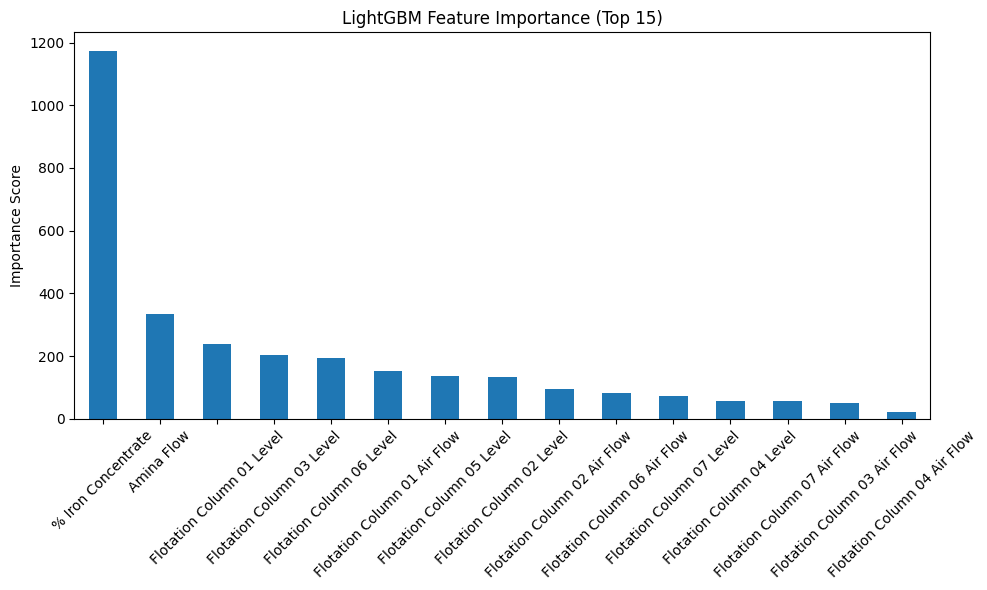

In [ ]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

importances = pd.Series(lgb_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

print("🔝 Top LightGBM Features:")
print(importances.head(15))

plt.figure(figsize=(10,6))
importances.head(15).plot(kind='bar')
plt.title('LightGBM Feature Importance (Top 15)')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top 15 features

In [ ]:
import plotly.graph_objects as go
models = ['Random Forest', 'LightGBM']
mae = [0.0388, 0.3030]
mse = [0.0126, 0.1687]
r2  = [0.9872, 0.8284]

fig = go.Figure(data=[
    go.Bar(name='MAE', x=models, y=mae),
    go.Bar(name='MSE', x=models, y=mse),
    go.Bar(name='R² Score', x=models, y=r2)
])

fig.update_layout(
    title='Model Comparison: Random Forest vs LightGBM',
    xaxis_title='Model',
    yaxis_title='Score',
    barmode='group',
    height=500,
    width=800
)

fig.show()

top 10 features

In [ ]:
top_features_10 = importances.head(10).index
X_train_10 = X_train[top_features_10]
X_test_10 = X_test[top_features_10]

lgb_model_10 = lgb.LGBMRegressor()
lgb_model_10.fit(X_train_10, y_train)

y_pred_10 = lgb_model_10.predict(X_test_10)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("LightGBM with Top 10 Features:")
print("MAE:", mean_absolute_error(y_test, y_pred_10))
print("MSE:", mean_squared_error(y_test, y_pred_10))
print("R² Score:", r2_score(y_test, y_pred_10))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 255743, number of used features: 10
[LightGBM] [Info] Start training from score 2.084226
LightGBM with Top 10 Features:
MAE: 0.3022788153162616
MSE: 0.1684703084333361
R² Score: 0.8286950966750066


#Lightgbm comparison with differenet no. of features

In [ ]:
import plotly.graph_objects as go

labels = ["23 Features", "15 Features", "10 Features", "8 Features", "5 Features"]
scores = [0.8261, 0.8284, 0.8287, 0.8233, 0.7925]

fig = go.Figure(go.Funnel(
    y=labels,
    x=scores,
    textinfo="value+percent previous",
    marker={"color": "lightseagreen"}
))

fig.update_layout(
    title="🔻 R² Score vs Number of Features (LightGBM)",
    template="plotly_white"
)

fig.show()

#ANNs


📌 Top Correlated Features with '% Silica Concentrate':
% Silica Concentrate            1.000000
Amina Flow                      0.171077
Flotation Column 05 Air Flow    0.072976
Ore Pulp pH                     0.068466
% Silica Feed                   0.065454
Flotation Column 01 Level       0.007905
Flotation Column 02 Level       0.001093
Ore Pulp Flow                  -0.001789
Ore Pulp Density               -0.014121
Flotation Column 03 Level      -0.021297
Flotation Column 06 Air Flow   -0.039025
Flotation Column 07 Air Flow   -0.054397
Starch Flow                    -0.056672
% Iron Feed                    -0.069429
Flotation Column 04 Air Flow   -0.084553
Name: % Silica Concentrate, dtype: float64


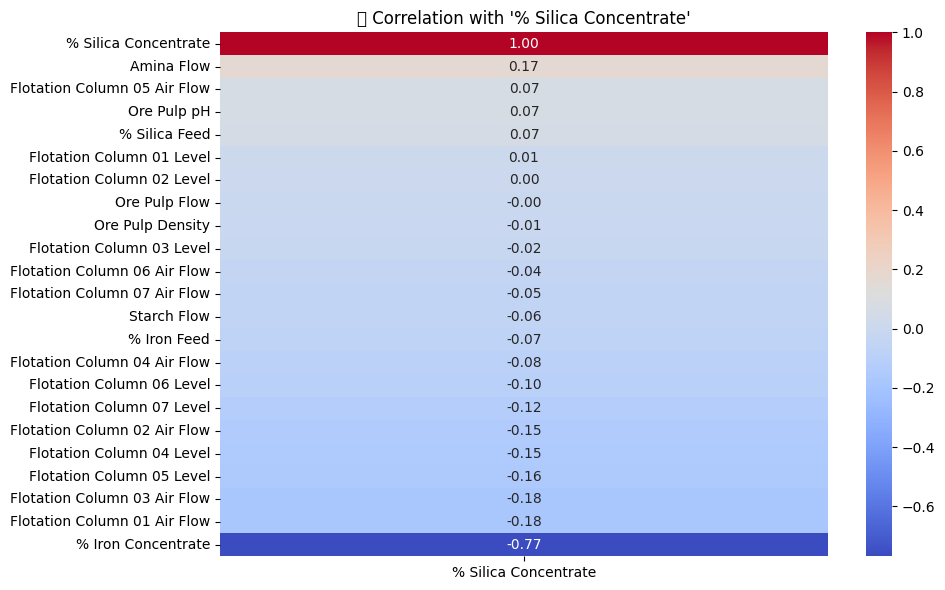

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

target_corr = correlation_matrix['% Silica Concentrate'].sort_values(ascending=False)

print("📌 Top Correlated Features with '% Silica Concentrate':")
print(target_corr.head(15))

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr()[['% Silica Concentrate']].sort_values(by='% Silica Concentrate', ascending=False),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("🔍 Correlation with '% Silica Concentrate'")
plt.tight_layout()
plt.show()

handling missing values and scaling

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ann_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

ann_model.fit(X_train, y_train)

y_pred = ann_model.predict(X_test)
print("✅ ANN Final Results with Scaling & Feature Selection:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

✅ ANN Final Results with Scaling & Feature Selection:
MAE: 0.4612216854558547
MSE: 0.4286216836816832
R² Score: 0.5981001041640571


deep ANN results

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df.drop(['% Silica Concentrate'], axis=1)
y = df['% Silica Concentrate']

df_ann = pd.concat([X, y], axis=1).dropna()
X = df_ann.drop(['% Silica Concentrate'], axis=1)
y = df_ann['% Silica Concentrate']

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.3, random_state=42
)

ann_model_deep = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32),  # ⬅ This is the enhancement
    max_iter=600,
    early_stopping=True,
    random_state=42
)

ann_model_deep.fit(X_train, y_train)

y_pred_scaled = ann_model_deep.predict(X_test)

y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_real = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

mae = mean_absolute_error(y_test_real, y_pred_real)
mse = mean_squared_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

print("📊 Deep ANN Enhanced Results:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

📊 Deep ANN Enhanced Results:
MAE: 0.1634134279615349
MSE: 0.05678677250388775
R² Score: 0.9422527323812334


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = df.drop(['% Silica Concentrate'], axis=1)
y = df['% Silica Concentrate']

df_ann = pd.concat([X, y], axis=1).dropna()
X = df_ann.drop(['% Silica Concentrate'], axis=1)
y = df_ann['% Silica Concentrate']

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

y_pred_scaled = model.predict(X_test)
y_test_real = scaler_y.inverse_transform(y_test)
y_pred_real = scaler_y.inverse_transform(y_pred_scaled)

mae = mean_absolute_error(y_test_real, y_pred_real)
mse = mean_squared_error(y_test_real, y_pred_real)
r2 = r2_score(y_test_real, y_pred_real)

print("\n📊 Keras ANN Results:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R² Score: {r2}")

Epoch 1/200
5595/5595 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0137 - mae: 0.0858 - val_loss: 0.0101 - val_mae: 0.0725
Epoch 2/200
5595/5595 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0099 - mae: 0.0725 - val_loss: 0.0089 - val_mae: 0.0681
Epoch 3/200
5595/5595 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0083 - mae: 0.0663 - val_loss: 0.0075 - val_mae: 0.0639
Epoch 4/200
5595/5595 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0075 - mae: 0.0627 - val_loss: 0.0071 - val_mae: 0.0606
Epoch 5/200
5595/5595 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0068 - mae: 0.0597 - val_loss: 0.0061 - val_mae: 0.0565
Epoch 6/200
5595/5595 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0062 - mae: 0.0569 - val_loss: 0.0061 - val_mae: 0.0553
Epoch 7/200
5595/5595 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0058 - mae: 0.0549 - val_loss: 0.0058 - val_mae: 0.0540
Epoch 8/200
5595/5595 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0054 - mae: 0.0528 - val_loss: 0.0051 - val_mae: 0.0512
Epoch 9/200
5595/5595 ━━

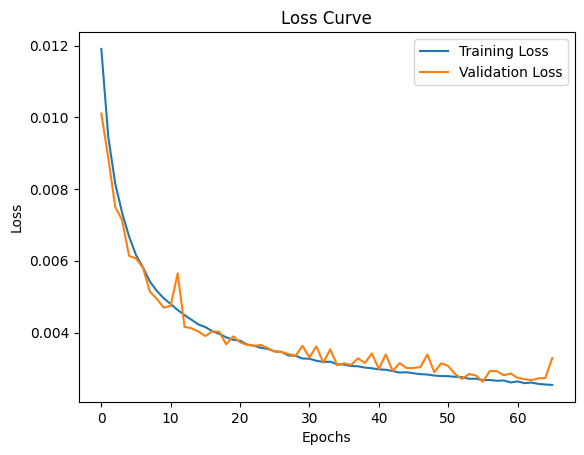

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()